In [28]:
import pandas as pd
import bt
import arch
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
import numpy as np

In [29]:
df = bt.get('SPX', start='2000-01-01')
df.head()

,spx,pct_change,stdev21,hvol21,variance
Date,,,,,
2000-03-02,2.49834,NaN,NaN,NaN,NaN
2000-03-03,1.87375,-0.250002,NaN,NaN,NaN
2000-03-06,2.49834,0.333337,NaN,NaN,NaN
2000-03-07,4.37209,0.749998,NaN,NaN,NaN
2000-03-13,1.99867,-0.542857,NaN,NaN,NaN


In [30]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean() # 24 hours on each day
    rolstd = timeseries.rolling(window).std()
    return rolstd

In [31]:
df['pct_change'] = df['spx'].pct_change().dropna()
df['stdev21'] = test_stationarity(df['pct_change'], 21)
df['hvol21'] = df['stdev21']*(252**0.5) # Annualize.
df['variance'] = df['hvol21']**2
df = df.dropna() # Remove rows with blank cells.
df.head()

,spx,pct_change,stdev21,hvol21,variance
Date,,,,,
2000-05-10,1.37409,0.000000,0.314858,4.998219,24.982194
2000-05-15,1.87375,0.363630,0.317543,5.040837,25.410035
2000-05-18,1.99867,0.066668,0.310641,4.931266,24.317386
2000-05-26,1.99867,0.000000,0.263368,4.180839,17.479418
2000-06-01,1.49900,-0.250001,0.240178,3.812701,14.536689


In [32]:
returns = df['pct_change'] * 100
am = arch.arch_model(returns)
res = am.fit(update_freq=5)
res.params

Iteration:      5,   Func. Count:     35,   Neg. LLF: 18468.197694912982
Iteration:     10,   Func. Count:     67,   Neg. LLF: 18466.5902488278
Iteration:     15,   Func. Count:     97,   Neg. LLF: 18464.38318696238
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 18464.38318714709
            Iterations: 15
            Function evaluations: 100
            Gradient evaluations: 15


mu            2.904627
omega       224.050704
alpha[1]      0.109167
beta[1]       0.890833
Name: params, dtype: float64

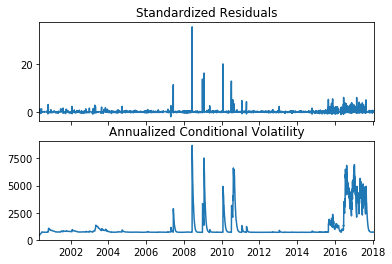

In [33]:
fig = res.plot(annualize='D')

In [34]:
df['C'] = res.params['omega']
df['B'] = df['variance'] * res.params['beta[1]']
df['A'] = (df['pct_change']**2) * res.params['alpha[1]']
df['forecast_var'] = df.loc[:,'C':'A'].sum(axis=1)
df['forecast_vol'] = 0.01 * np.sqrt(res.params['omega'] + res.params['alpha[1]'] * res.resid**2 + res.conditional_volatility**2 * res.params['beta[1]'])
df.head()

C:\Newfolder\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Newfolder\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Newfolder\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexi

,spx,pct_change,stdev21,hvol21,variance,C,B,A,forecast_var,forecast_vol
Date,,,,,,,,,,
2000-05-10,1.37409,0.000000,0.314858,4.998219,24.982194,224.050704,22.254959,0.000000,246.305663,0.306435
2000-05-15,1.87375,0.363630,0.317543,5.040837,25.410035,224.050704,22.636094,0.014435,246.701233,0.343914
2000-05-18,1.99867,0.066668,0.310641,4.931266,24.317386,224.050704,21.662727,0.000485,245.713916,0.357666
2000-05-26,1.99867,0.000000,0.263368,4.180839,17.479418,224.050704,15.571240,0.000000,239.621944,0.369401
2000-06-01,1.49900,-0.250001,0.240178,3.812701,14.536689,224.050704,12.949760,0.006823,237.007287,0.390469


In [35]:
df.head()

,spx,pct_change,stdev21,hvol21,variance,C,B,A,forecast_var,forecast_vol
Date,,,,,,,,,,
2000-05-10,1.37409,0.000000,0.314858,4.998219,24.982194,224.050704,22.254959,0.000000,246.305663,0.306435
2000-05-15,1.87375,0.363630,0.317543,5.040837,25.410035,224.050704,22.636094,0.014435,246.701233,0.343914
2000-05-18,1.99867,0.066668,0.310641,4.931266,24.317386,224.050704,21.662727,0.000485,245.713916,0.357666
2000-05-26,1.99867,0.000000,0.263368,4.180839,17.479418,224.050704,15.571240,0.000000,239.621944,0.369401
2000-06-01,1.49900,-0.250001,0.240178,3.812701,14.536689,224.050704,12.949760,0.006823,237.007287,0.390469


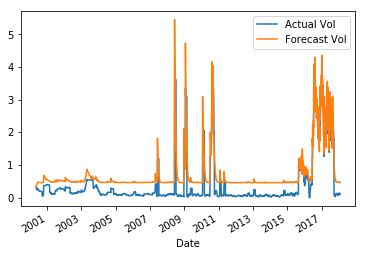

In [36]:
df1 = pd.concat([df.stdev21,df.forecast_vol],1)
df1.columns = ['Actual Vol', 'Forecast Vol']
subplot = df1.plot()